In [1]:
import pandas as pd

In [2]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
filmes.columns = ['filmeId','titulo','generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# lendo a documentacao de um metodo/atributo

?filmes.head

In [4]:
# lendo a documentacao do tipo (docstring)

?filmes

In [5]:
avaliacoes = pd.read_csv('https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
avaliacoes.shape

(100836, 4)

In [7]:
avaliacoes.columns = ['usuarioId','filmeId','nota','momento']
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
avaliacoes.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [10]:
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [11]:
avaliacoes.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [12]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")

In [13]:
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [40]:
avaliacoes_do_filme_1.nota.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [41]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [44]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [54]:
filmes_com_media.rename(columns={"nota": "nota_media"},inplace=True)

In [55]:
filmes_com_media.sort_values('nota_media',ascending=False).head(15)

,filmeId,titulo,generos,nota_media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


In [57]:
# quantos filmes não tem avaliações

filmes_com_media[filmes_com_media.nota_media.isna()].shape[0]

18

In [58]:
#e quais são esses filmes

filmes_com_media[filmes_com_media.nota_media.isna()]

,filmeId,titulo,generos,nota_media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [59]:
avaliacoes_por_filme = avaliacoes.groupby("filmeId")["nota"].count().rename("avaliacoes")


In [62]:
# DataFrame join com avaliacoes

filmes_avaliacoes_media = filmes_com_media.join(avaliacoes_por_filme, on="filmeId")
filmes_avaliacoes_media.head()

,filmeId,titulo,generos,nota_media,avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [70]:
filmes_avaliacoes_media.round({'nota_media': 2})

,filmeId,titulo,generos,nota_media,avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


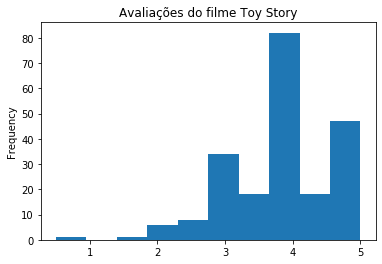

In [61]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId==1").nota.plot(kind="hist", 
                                         title="Avaliações do filme Toy Story")
#plt.title("Avaliações do filme Toy Story")
plt.show()

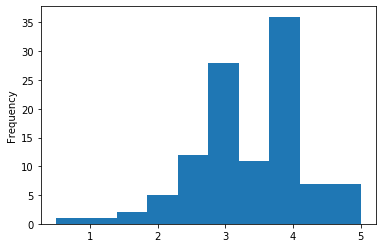

In [24]:
avaliacoes.query("filmeId==2").nota.plot(kind="hist")

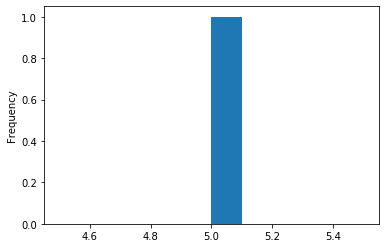

In [71]:
avaliacoes.query("filmeId==102084").nota.plot(kind="hist")

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

#### dummies

In [116]:
generos = filmes.generos.str.get_dummies()
generos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
generos_lista = pd.Series(generos.columns)
generos_lista

0     (no genres listed)
1                 Action
2              Adventure
3              Animation
4               Children
5                 Comedy
6                  Crime
7            Documentary
8                  Drama
9                Fantasy
10             Film-Noir
11                Horror
12                  IMAX
13               Musical
14               Mystery
15               Romance
16                Sci-Fi
17              Thriller
18                   War
19               Western
dtype: object

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [112]:
qtd_generos = pd.DataFrame(generos.sum()).reset_index()
qtd_generos.columns = ['genero','filmes']
qtd_generos

,genero,filmes
0,(no genres listed),34
1,Action,1828
2,Adventure,1263
3,Animation,611
4,Children,664
5,Comedy,3756
6,Crime,1199
7,Documentary,440
8,Drama,4361
9,Fantasy,779


In [117]:
dados_dos_filmes = pd.concat([filmes,generos],axis=1)
dados_dos_filmes.head()

,filmeId,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

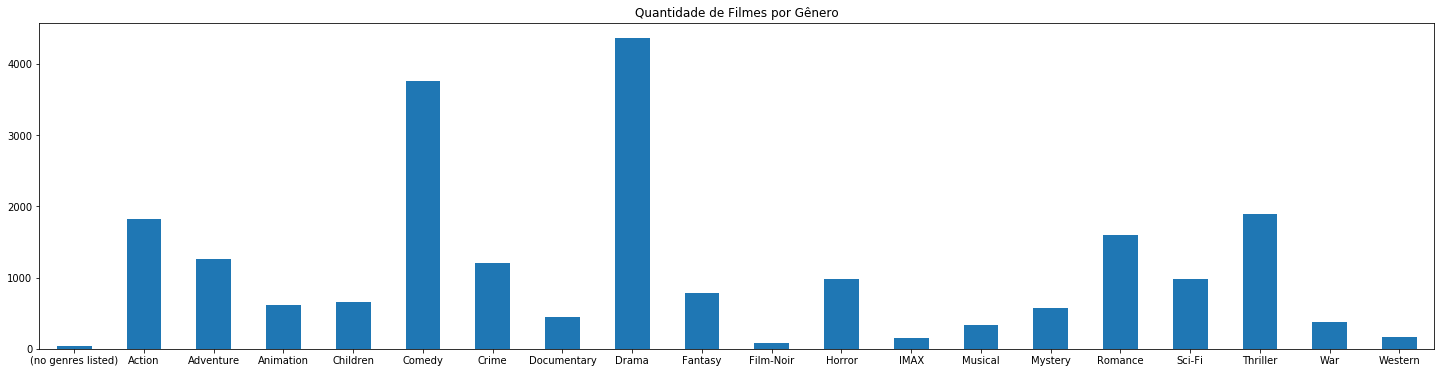

In [126]:
generos.sum().plot(kind='bar',figsize=(25,6),
                   use_index=True, 
                   title="Quantidade de Filmes por Gênero",
                   rot=0)
plt.show()

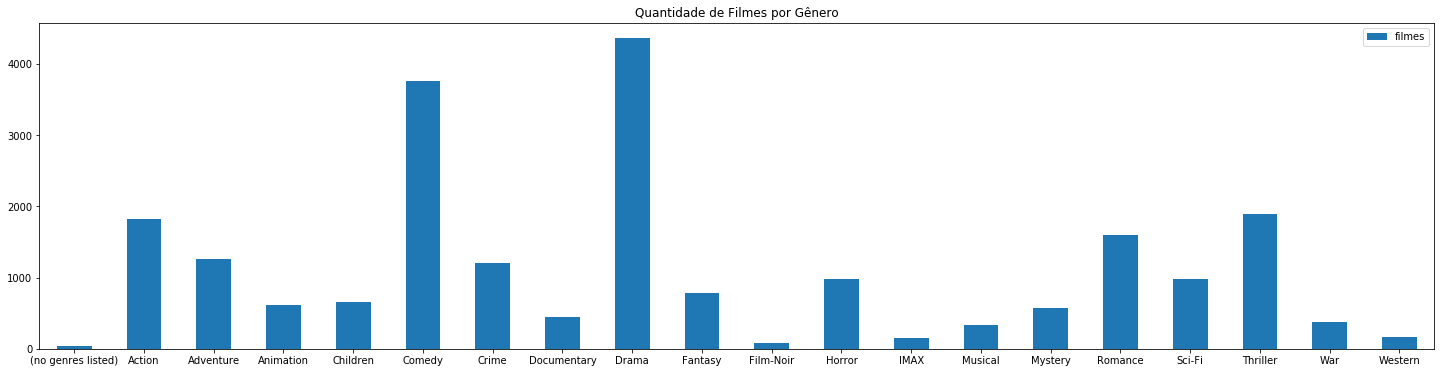

In [127]:
qtd_generos.plot(kind="bar",figsize=(25,6),
                   title="Quantidade de Filmes por Gênero",
                   rot=0)
plt.xticks(qtd_generos.index, qtd_generos.genero)
plt.show()